HEADER

Imports and other necessary code

In [ ]:
#Data Processing
import numpy as np #array processing
import matplotlib.pyplot as plt #graphing
import datetime as dt
import matplotlib.dates as mdates
from dateutil import parser
import pandas as pd #dataframe processing
import os 
from sklearn.preprocessing import StandardScaler #normalization
from sklearn.preprocessing import MinMaxScaler #normalization
import math
import statsmodels.formula.api as sm #stats
from google.colab import  drive #mounting drive
import seaborn as sns #visualisation
import sklearn
from sklearn.linear_model import Lasso
from IPython.display import display, HTML 
from sklearn.linear_model import Ridge
import datetime

#LSTM Model/Keras
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
from keras.callbacks import EarlyStopping
from sklearn import metrics
from keras.layers.core import Dense, Activation
from keras.callbacks import ModelCheckpoint
drive.mount('/drive',force_remount=True)
from tensorflow import keras

#Regression
from sklearn.linear_model import LassoCV
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split 

Mounted at /drive


Importing Dataset

In [ ]:
df = pd.read_csv('/drive/My Drive/Senior Project/Data/Final Dataset.csv')
df = df.iloc[: , 1:]

In [ ]:
df.columns

Index(['Date', 'DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose',
       'DIAVolume', 'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose',
       'SPYVolume', 'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose',
       'QQQVolume', 'QQQ20dFWD', 'DXY', 'US2YR', 'US10YR', 'ISMPMI', 'USPPI',
       'GDP'],
      dtype='object')

In [ ]:
df

In [ ]:
df_with_macro = df.iloc[: , 1:]

In [ ]:
df_with_macro

In [ ]:
df_no_macro = df.iloc[: , :-6]

In [ ]:
df_no_macro = df_no_macro.iloc[: , 1:]

In [ ]:
df_no_macro

Data Visualization

In [ ]:
headers = list(df_with_macro.columns.values)
fields = []

for field in headers:
    fields.append({
        'name' : field,
        'mean': df_with_macro[field].mean(),
        'var': df_with_macro[field].var(),
        'sdev': df_with_macro[field].std()
    })

for field in fields:
    print(field)

{'name': 'DIAOpen', 'mean': 154.91968428356378, 'var': 4976.931395532049, 'sdev': 70.54736986969853}
{'name': 'DIAHigh', 'mean': 155.77082365709333, 'var': 5011.765834139766, 'sdev': 70.79382624311081}
{'name': 'DIALow', 'mean': 153.98456422231877, 'var': 4935.2249020148765, 'sdev': 70.25115587671762}
{'name': 'DIAClose', 'mean': 154.92123663771633, 'var': 4975.562916773555, 'sdev': 70.53767019666552}
{'name': 'DIAdjClose', 'mean': 128.5730439965398, 'var': 6267.385990954803, 'sdev': 79.16682380236561}
{'name': 'DIAVolume', 'mean': 7176990.795847751, 'var': 47752450927155.22, 'sdev': 6910314.821131901}
{'name': 'SPYOpen', 'mean': 177.545963136505, 'var': 7539.53095826037, 'sdev': 86.83047252123168}
{'name': 'SPYHigh', 'mean': 178.5832656034602, 'var': 7597.907001671329, 'sdev': 87.16597387554005}
{'name': 'SPYLow', 'mean': 176.3926835207614, 'var': 7471.649025720627, 'sdev': 86.4387009719641}
{'name': 'SPYClose', 'mean': 177.545301450346, 'var': 7541.333876615058, 'sdev': 86.8408537303

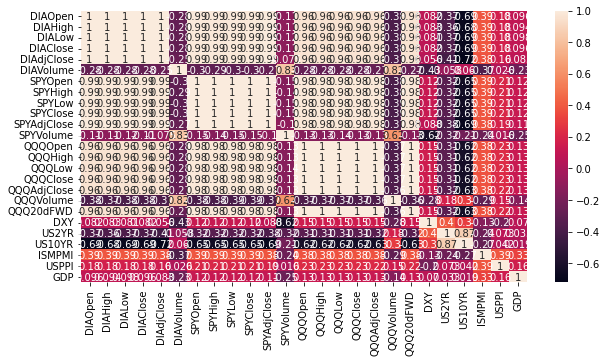

In [ ]:
#Heatmap of macro data set
plt.figure(figsize=(10,5))
c= df_with_macro.corr()
sns.heatmap(c,annot=True)

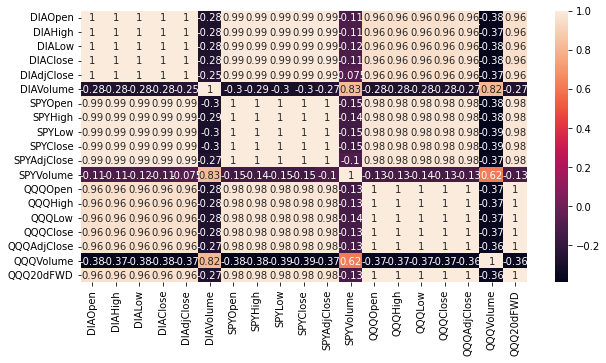

In [ ]:
#Heatmap of dataset with no macro data
plt.figure(figsize=(10,5))
c= df_no_macro.corr()
sns.heatmap(c,annot=True)

Regression with macro

In [ ]:
# Simple function to evaluate the coefficients of a regression
%matplotlib inline    
   
def report_coef(names,coef,intercept):
    r = pd.DataFrame( { 'coef': coef, 'positive': coef>=0  }, 
                     index = names )
    r = r.sort_values(by=['coef'])
    display(r)
    print(f"Intercept: {intercept}")
    r['coef'].plot(kind='barh', color=r['positive'].map(
        {True: 'b', False: 'r'}))

In [ ]:
dates = df['Date'].copy().to_numpy()
x_values = [datetime.datetime.strptime(d,"%m/%d/%Y").date() for d in dates]
test_data_index = 0.75*len(x_values)
dates = x_values[int(test_data_index):]

In [ ]:

# Regression chart.
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(dates, t['pred'].tolist(), label='prediction')
    plt.plot(dates, t['y'].tolist(), label='Actual')
    plt.ylabel('output')
    plt.legend()
    plt.show()

def chart_Zoom(pred, y, sort=True,):
      t = pd.DataFrame({'pred': pred, 'y': y.flatten()})
      if sort:
        t.sort_values(by=['y'], inplace=True)
      plt.plot(dates[1000:1200], t['y'].tolist()[1000:1200], label='Actual')
      plt.plot(dates[1000:1200], t['pred'].tolist()[1000:1200], label='prediction')
      plt.ylabel('output')
      plt.legend()
      plt.gcf().autofmt_xdate()
      plt.show()



In [ ]:
names = ['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'DXY', 'US2YR', 'US10YR', 'ISMPMI', 'USPPI', 'GDP']

x = df_with_macro[names].values
y = df_with_macro['QQQ20dFWD'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25)

Final score (RMSE): 4.804245425312495


,coef,positive
US10YR,-1.426699e+00,False
QQQClose,-1.003339e+00,False
SPYAdjClose,-4.924705e-01,False
DIALow,-2.847834e-01,False
DIAClose,-1.327157e-01,False
QQQHigh,-1.223787e-01,False
DIAOpen,-9.862770e-02,False
USPPI,-9.443719e-02,False
GDP,-5.055713e-02,False
SPYOpen,-3.302286e-02,False


Intercept: 5.937796649235153


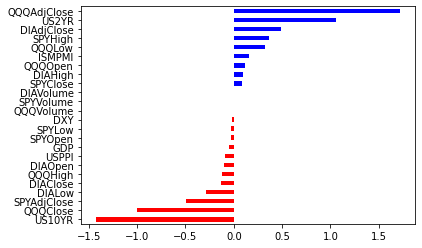

In [ ]:
#Regression

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)

# Predict
pred_regression_macro = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred_regression_macro,y_test))
print(f"Final score (RMSE): {score}")

report_coef(names,regressor.coef_,regressor.intercept_)

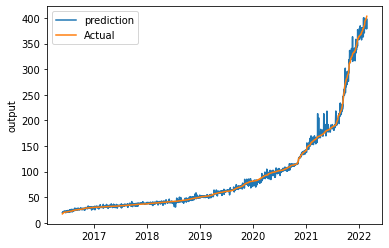

In [ ]:
# Plot the chart
chart_regression(pred_regression_macro.flatten(),y_test)

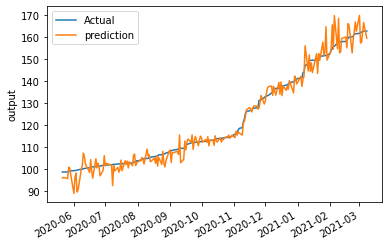

In [ ]:
chart_Zoom(pred_regression_macro.flatten(), y_test)

Final score (RMSE): 4.887773940438018


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.872e+04, tolerance: 3.015e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,coef,positive
DIAOpen,-2.338662e-01,False
SPYOpen,-2.258833e-01,False
US10YR,-7.636782e-02,False
USPPI,-5.922719e-02,False
GDP,-4.695269e-02,False
DIALow,-3.154191e-02,False
SPYLow,-2.496303e-02,False
SPYVolume,-1.417067e-08,False
DIAClose,-0.000000e+00,True
DIAHigh,-0.000000e+00,True


Intercept: 3.829301098725651


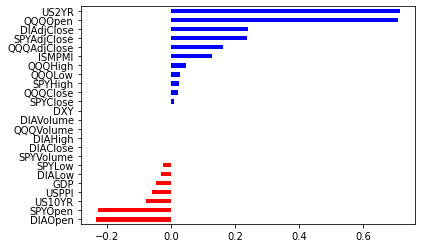

In [ ]:
#L1 (Lasso) Regularization

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)

# Predict
pred_L1_macro = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred_L1_macro,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

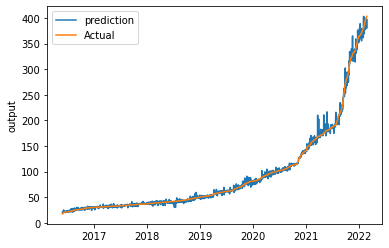

In [ ]:
# Plot the chart
chart_regression(pred_L1_macro.flatten(),y_test)

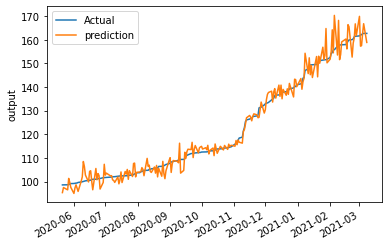

In [ ]:
chart_Zoom(pred_L1_macro.flatten(), y_test)

Final score (RMSE): {score}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.79606e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


,coef,positive
US10YR,-1.426381e+00,False
QQQClose,-1.002971e+00,False
SPYAdjClose,-4.922306e-01,False
DIALow,-2.847694e-01,False
DIAClose,-1.325366e-01,False
QQQHigh,-1.224527e-01,False
DIAOpen,-9.871045e-02,False
USPPI,-9.444321e-02,False
GDP,-5.055681e-02,False
SPYOpen,-3.295209e-02,False


Intercept: 5.936744553326548


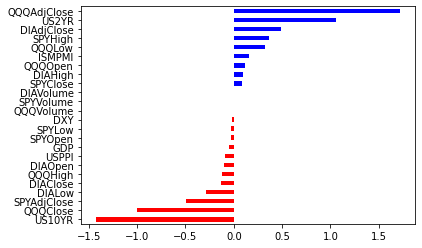

In [ ]:
#L2 (Ridge) Regularization

# Create linear regression
regressor = Ridge(random_state=0,alpha=0.1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred_L2_macro = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred_L2_macro,y_test))
print("Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

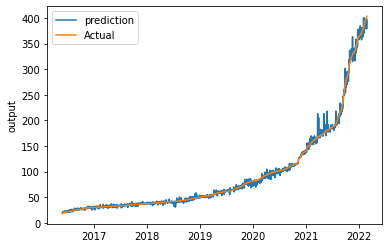

In [ ]:
# Plot the chart
chart_regression(pred_L2_macro.flatten(),y_test)

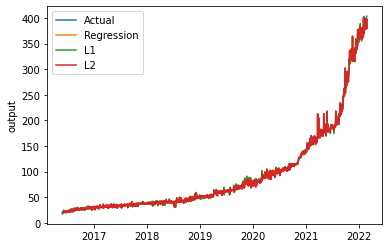

In [ ]:
sort = True
t = pd.DataFrame({'pred_regression_macro': pred_regression_macro, 'pred_L1_macro': pred_L1_macro, 
                  'pred_L2_macro': pred_L2_macro, 'y': y_test.flatten()})
if sort:
  t.sort_values(by=['y'], inplace=True)
plt.plot(dates, t['y'].tolist(), label='Actual')
plt.plot(dates, t['pred_regression_macro'].tolist(), label='Regression')
plt.plot(dates, t['pred_L1_macro'].tolist(), label='L1')
plt.plot(dates, t['pred_L2_macro'].tolist(), label='L2')
plt.ylabel('output')
plt.legend()
plt.show()

Regression no macro

In [ ]:
names = ['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose',
       'DIAVolume', 'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose',
       'SPYVolume', 'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose',
       'QQQVolume']

x = df_no_macro[names].values
y = df_no_macro['QQQ20dFWD'].values # regression

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    x, y, test_size=0.25, random_state=45)

In [ ]:
#Regression

# Create linear regression
regressor = sklearn.linear_model.LinearRegression()

# Fit/train linear regression
regressor.fit(x_train,y_train)

# Predict
pred_regression = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred_regression,y_test))
print(f"Final score (RMSE): {score}")

report_coef(names,regressor.coef_,regressor.intercept_)

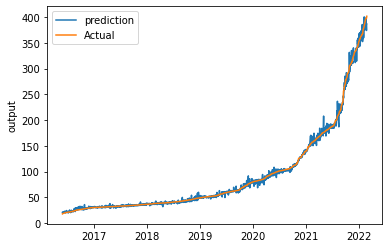

In [ ]:
# Plot the chart
chart_regression(pred_regression.flatten(),y_test)

Final score (RMSE): 4.601395415593751


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.196e+04, tolerance: 3.035e+03
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


,coef,positive
SPYOpen,-2.163669e-01,False
DIAOpen,-1.380653e-01,False
DIALow,-1.317078e-02,False
SPYLow,-9.085646e-03,False
SPYVolume,-1.694742e-08,False
DIAClose,-0.000000e+00,True
QQQVolume,1.132555e-08,True
DIAVolume,9.309230e-08,True
SPYClose,1.433773e-03,True
DIAHigh,1.620276e-02,True


Intercept: 6.098777459706795


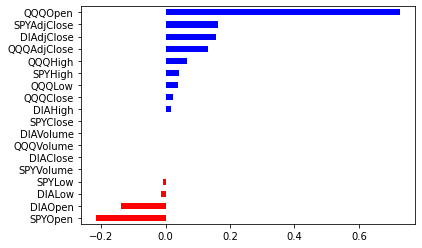

In [ ]:
#L1 (Lasso) Regularization

# Create linear regression
regressor = Lasso(random_state=0,alpha=0.1)

# Fit/train LASSO
regressor.fit(x_train,y_train)
# Predict
pred_L1 = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred_L1,y_test))
print(f"Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

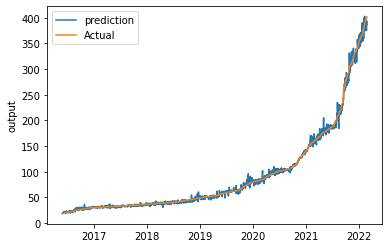

In [ ]:
# Plot the chart
chart_regression(pred_L1.flatten(),y_test)

Final score (RMSE): {score}


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.13209e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


,coef,positive
QQQClose,-8.682836e-01,False
SPYAdjClose,-6.835917e-01,False
DIAOpen,-3.144303e-01,False
QQQOpen,-2.842097e-01,False
DIALow,-1.699347e-01,False
DIAClose,-1.276103e-01,False
SPYClose,-1.220050e-01,False
QQQVolume,-8.062550e-09,False
SPYVolume,-1.101692e-09,False
DIAVolume,2.619865e-08,True


Intercept: 6.159984618479882


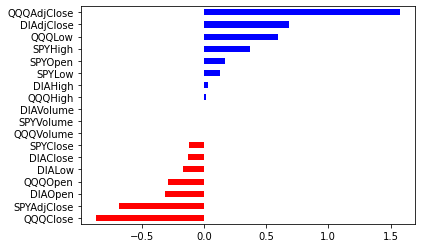

In [ ]:
#L2 (Ridge) Regularization

# Create linear regression
regressor = Ridge(random_state=0,alpha=0.1)

# Fit/train Ridge
regressor.fit(x_train,y_train)
# Predict
pred_L2 = regressor.predict(x_test)

# Measure RMSE error.  RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(pred_L2,y_test))
print("Final score (RMSE): {score}")

report_coef(
  names,
  regressor.coef_,
  regressor.intercept_)

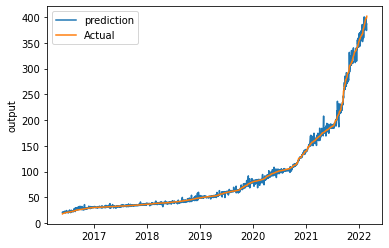

In [ ]:
# Plot the chart
chart_regression(pred_L2.flatten(),y_test)

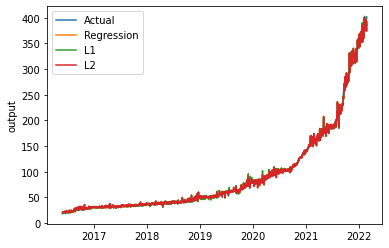

In [ ]:
sort = True
t = pd.DataFrame({'pred_regression_macro': pred_regression, 'pred_L1_macro': pred_L1, 
                  'pred_L2_macro': pred_L2, 'y': y_test.flatten()})
if sort:
  t.sort_values(by=['y'], inplace=True)
plt.plot(dates, t['y'].tolist(), label='Actual')
plt.plot(dates, t['pred_regression_macro'].tolist(), label='Regression')
plt.plot(dates, t['pred_L1_macro'].tolist(), label='L1')
plt.plot(dates, t['pred_L2_macro'].tolist(), label='L2')
plt.ylabel('output')
plt.legend()
plt.show()

Deep Learning Model with macro data


In [ ]:
QQQ20dFWD_max = df_with_macro['QQQ20dFWD'].values

In [ ]:
#Perform scaling
sc = MinMaxScaler(feature_range=(0,1))
df_with_macro[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD', 'DXY', 'US2YR', 'US10YR', 'ISMPMI', 'USPPI', 'GDP']] = sc.fit_transform(df_with_macro[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD', 'DXY', 'US2YR', 'US10YR', 'ISMPMI', 'USPPI', 'GDP']])

In [ ]:
df_with_macro.drop(columns = 'QQQ20dFWD',inplace=True)

In [ ]:
# Finding the value 75th percentile of TimeStamp
training_pt = math.floor((len(df_with_macro)*0.75))
training_pt = int(training_pt)
print(training_pt)

Pt_to_split = df_with_macro[training_pt:(training_pt+1)]['QQQAdjClose']
print("Index of split  =", Pt_to_split)
df_train = df_with_macro[:training_pt]
df_test = df_with_macro[training_pt+1:]
print("Number of observations in train = {} \
    \n Number of observations in test = {}".format(df_train.shape[0],
                                                  df_test.shape[0]))

In [ ]:
#separating into train and test sets
x1_train = df_train
x1_test = df_test

print("Training set has {} observations.".format(len(x1_train)))
print("Test set has {} observations.".format(len(x1_test)))

In [ ]:
def to_sequences(seq_size, obs):
    length_obs = obs.shape[0]
    #print("length_obs")
    #print(length_obs)
    x = []
    y = []
    PA = 20 # Hyper parameter

    for i in range(length_obs-SEQUENCE_SIZE-PA):
#         window = obs[i:(i+SEQUENCE_SIZE)]
        window = obs.iloc[i:(i+SEQUENCE_SIZE)]
#         after_window = obs[i+SEQUENCE_SIZE]
        after_window = obs.iloc[i+SEQUENCE_SIZE+PA]
#         window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(np.array(window))
#         y.append(after_window)
        y.append(after_window['QQQAdjClose'])
        #y.append(after_window[QQQ20dFWD[i]])
        
#     return np.array(x),np.array(y)
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 16
x_train,y_train = to_sequences(SEQUENCE_SIZE,x1_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,x1_test)

print("Training : Shape of X: {} & Y shape = {}".format(x_train.shape,len(y_train)))
print("Test : Shape of X: {} & Y shape = {} ".format(x_test.shape,len(y_test)))

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

In [ ]:
sq_size, feature_length = x_train[0].shape

In [ ]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
print('Build model...')
model = Sequential()
model.add(LSTM(30, return_sequences = True, activation='relu', input_shape=(sq_size, feature_length), kernel_initializer = 'random_normal'))
model.add(Dropout(.005))
model.add(LSTM(30, activation='relu', kernel_initializer = 'random_normal'))
model.add(Dropout(.005))
model.add(Dense(128))
#model.add(LSTM(units = 50))
model.add(Dense(units=1, kernel_initializer = 'random_normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,  
                        verbose=1, mode='auto', restore_best_weights=True)

model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=1000, batch_size = 16)
y_pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Final score (RMSE): {}".format(score))

Epoch 1/1000
269/269 [==============================] - 8s 18ms/step - loss: 9.5435e-04 - val_loss: 0.0762
Epoch 2/1000
269/269 [==============================] - 5s 17ms/step - loss: 1.1285e-04 - val_loss: 0.0225
Epoch 3/1000
269/269 [==============================] - 5s 17ms/step - loss: 1.0390e-04 - val_loss: 0.0073
Epoch 4/1000
269/269 [==============================] - 8s 30ms/step - loss: 9.3805e-05 - val_loss: 0.0031
Epoch 5/1000
269/269 [==============================] - 9s 32ms/step - loss: 9.9669e-05 - val_loss: 0.0044
Epoch 6/1000
269/269 [==============================] - 8s 30ms/step - loss: 8.8313e-05 - val_loss: 0.0054
Epoch 7/1000
269/269 [==============================] - 9s 33ms/step - loss: 9.2047e-05 - val_loss: 0.0157
Epoch 8/1000
269/269 [==============================] - 8s 28ms/step - loss: 7.8642e-05 - val_loss: 0.0214
Epoch 9/1000
269/269 [==============================] - 8s 30ms/step - loss: 7.9259e-05 - val_loss: 0.0220
Epoch 9: early stopping
Final score (

In [ ]:
weights = model.get_weights()
for i in range(len(weights)):
    print(weights[i].shape)

(24, 120)
(30, 120)
(120,)
(30, 120)
(30, 120)
(120,)
(30, 128)
(128,)
(128, 1)
(1,)


In [ ]:
x_dates = df['Date'].values

QQQ20dFWD_normal = df['QQQ20dFWD'].values

actual_prediction = y_pred * QQQ20dFWD_normal.max()
actual_test = y_test * QQQ20dFWD_normal.max()

x_dates = x_dates[-(actual_prediction.shape[0]):]

x_val = []
x_labels = []
for i in range(0, actual_prediction.shape[0]):
  if (i%180==0):
    x_val.append(i)
    x_labels.append(x_dates[i])

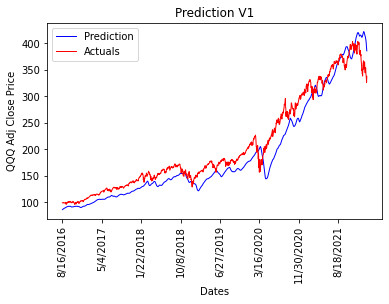

In [ ]:
lineWidth = 1
plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x_dates,actual_prediction , lw=lineWidth, c='b', label = "Prediction")
plt.plot(x_dates, actual_test, lw=lineWidth, c='r', label = "Actuals")
plt.gcf().autofmt_xdate()
plt.title('Prediction V1')
plt.xlabel('Dates')
plt.ylabel('QQQ Adj Close Price')
plt.xticks(x_val, x_labels, rotation=90)
plt.legend()
plt.show()

Deep Learning Model without macro data


In [ ]:
QQQ20dFWD_max_01 = df_no_macro['QQQ20dFWD'].values

In [ ]:
#Perform scaling
sc = MinMaxScaler(feature_range=(0,1))
df_no_macro[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD']] = sc.fit_transform(df_no_macro[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD']])

In [ ]:
df_no_macro.drop(columns = 'QQQ20dFWD',inplace=True)

In [ ]:
# Finding the value 75th percentile of TimeStamp
training_pt = math.floor((len(df_no_macro)*0.75))
training_pt = int(training_pt)
print(training_pt)

Pt_to_split = df_no_macro[training_pt:(training_pt+1)]['QQQAdjClose']
print("Index of split  =",Pt_to_split)
df_train = df_no_macro[:training_pt]
df_test = df_no_macro[training_pt+1:]
print("Number of observations in train = {} \
    \n Number of observations in test = {}".format(df_train.shape[0],
                                                  df_test.shape[0]))

In [ ]:
#separating into train and test sets
x1_train = df_train
x1_test = df_test

print("Training set has {} observations.".format(len(x1_train)))
print("Test set has {} observations.".format(len(x1_test)))

In [ ]:
def to_sequences(seq_size, obs):
    length_obs = obs.shape[0]
    #print("length_obs")
    #print(length_obs)
    x = []
    y = []
    PA = 20 # Hyper parameter

    for i in range(length_obs-SEQUENCE_SIZE-PA):
#         window = obs[i:(i+SEQUENCE_SIZE)]
        window = obs.iloc[i:(i+SEQUENCE_SIZE)]
#         after_window = obs[i+SEQUENCE_SIZE]
        after_window = obs.iloc[i+SEQUENCE_SIZE+PA]
#         window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(np.array(window))
#         y.append(after_window)
        y.append(after_window['QQQAdjClose'])
        #y.append(after_window[QQQ20dFWD[i]])
        
#     return np.array(x),np.array(y)
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 16
x_train,y_train = to_sequences(SEQUENCE_SIZE,x1_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,x1_test)

print("Training : Shape of X: {} & Y shape = {}".format(x_train.shape,len(y_train)))
print("Test : Shape of X: {} & Y shape = {} ".format(x_test.shape,len(y_test)))

In [ ]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4299, 16, 18)
(1408, 16, 18)
(4299,)
(1408,)


In [ ]:
sq_size, feature_length = x_train[0].shape

In [ ]:
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_test).astype(np.float32)
y_test = np.asarray(y_test).astype(np.float32)

In [ ]:
print('Build model...')
model = Sequential()
model.add(LSTM(30, return_sequences = True, activation='relu', input_shape=(sq_size, feature_length), kernel_initializer = 'random_normal'))
model.add(Dropout(.005))
model.add(LSTM(30, activation='relu', kernel_initializer = 'random_normal'))
model.add(Dropout(.005))
model.add(Dense(128))
#model.add(LSTM(units = 50))
model.add(Dense(units=1, kernel_initializer = 'random_normal'))

model.compile(loss='mean_squared_error', optimizer='adam')

model.summary()

Build model...
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 16, 30)            5880      
                                                                 
 dropout_6 (Dropout)         (None, 16, 30)            0         
                                                                 
 lstm_7 (LSTM)               (None, 30)                7320      
                                                                 
 dropout_7 (Dropout)         (None, 30)                0         
                                                                 
 dense_6 (Dense)             (None, 128)               3968      
                                                                 
 dense_7 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,297
Trainable params: 

In [ ]:
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5,  
                        verbose=1, mode='auto', restore_best_weights=True)

history = model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=1,epochs=1000, batch_size = 16)
y_pred = model.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Final score (RMSE): {}".format(score))

Epoch 1/1000
269/269 [==============================] - 10s 21ms/step - loss: 7.2875e-04 - val_loss: 0.0062
Epoch 2/1000
269/269 [==============================] - 4s 16ms/step - loss: 1.4215e-04 - val_loss: 0.0320
Epoch 3/1000
269/269 [==============================] - 6s 24ms/step - loss: 1.4025e-04 - val_loss: 0.0796
Epoch 4/1000
269/269 [==============================] - 6s 23ms/step - loss: 1.2875e-04 - val_loss: 0.1741
Epoch 5/1000
269/269 [==============================] - 6s 23ms/step - loss: 1.2386e-04 - val_loss: 0.1856
Epoch 6/1000
269/269 [==============================] - 6s 24ms/step - loss: 1.2310e-04 - val_loss: 0.2589
Epoch 6: early stopping
Final score (RMSE): 0.07854951173067093


In [ ]:
x_dates = df['Date'].values

QQQ20dFWD_normal = df['QQQ20dFWD'].values

actual_prediction = y_pred * QQQ20dFWD_normal.max()
actual_test = y_test * QQQ20dFWD_normal.max()

x_dates = x_dates[-(actual_prediction.shape[0]):]

x_val = []
x_labels = []
for i in range(0, actual_prediction.shape[0]):
  if (i%180==0):
    x_val.append(i)
    x_labels.append(x_dates[i])

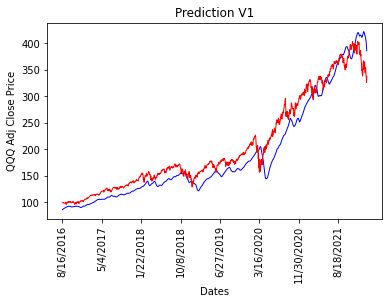

In [ ]:
lineWidth = 1
plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x_dates, actual_prediction, lw=lineWidth, c='b')
plt.plot(x_dates, actual_test, lw=lineWidth, c='r')
plt.gcf().autofmt_xdate()
plt.title('Prediction V1')
plt.xlabel('Dates')
plt.ylabel('QQQ Adj Close Price')
plt.xticks(x_val, x_labels, rotation=90)
plt.legend()
plt.show()

Use the deep learning models on SPY with macro


In [ ]:
df_SPY = pd.read_csv('/drive/My Drive/Senior Project/Data/Final Dataset.csv')
df_SPY = df_SPY.iloc[: , 1:]
df_SPY = df_SPY.iloc[: , 1:]

In [ ]:
#Perform scaling
sc = MinMaxScaler(feature_range=(0,1))
df_SPY[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD', 'DXY', 'US2YR', 'US10YR', 'ISMPMI', 'USPPI', 'GDP']] = sc.fit_transform(df_SPY[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD', 'DXY', 'US2YR', 'US10YR', 'ISMPMI', 'USPPI', 'GDP']])

In [ ]:
df_SPY.drop(columns = 'QQQ20dFWD',inplace=True)

In [ ]:
# Finding the value 75th percentile of TimeStamp
training_pt = math.floor((len(df_SPY)*0.75))
training_pt = int(training_pt)
print(training_pt)

Pt_to_split = df_SPY[training_pt:(training_pt+1)]['SPYAdjClose']
print("Index of split  =",Pt_to_split)
df_train = df_SPY[:training_pt]
df_test = df_SPY[training_pt+1:]
print("Number of observations in train = {} \
    \n Number of observations in test = {}".format(df_train.shape[0],
                                                  df_test.shape[0]))

In [ ]:
#separating into train and test sets
x1_train = df_train
x1_test = df_test

print("Training set has {} observations.".format(len(x1_train)))
print("Test set has {} observations.".format(len(x1_test)))

Training set has 4335 observations.
Test set has 1444 observations.


In [ ]:
def to_sequences(seq_size, obs):
    length_obs = obs.shape[0]
    #print("length_obs")
    #print(length_obs)
    x = []
    y = []
    PA = 20 # Hyper parameter

    for i in range(length_obs-SEQUENCE_SIZE-PA):
#         window = obs[i:(i+SEQUENCE_SIZE)]
        window = obs.iloc[i:(i+SEQUENCE_SIZE)]
#         after_window = obs[i+SEQUENCE_SIZE]
        after_window = obs.iloc[i+SEQUENCE_SIZE+PA]
#         window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(np.array(window))
#         y.append(after_window)
        y.append(after_window['SPYAdjClose'])
        #y.append(after_window[QQQ20dFWD[i]])
        
#     return np.array(x),np.array(y)
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 16
x_train,y_train = to_sequences(SEQUENCE_SIZE,x1_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,x1_test)

print("Training : Shape of X: {} & Y shape = {}".format(x_train.shape,len(y_train)))
print("Test : Shape of X: {} & Y shape = {} ".format(x_test.shape,len(y_test)))

In [ ]:
model_01 = keras.models.load_model('/drive/My Drive/Senior Project/Data/Macro.0518')

In [ ]:
y_pred = model_01.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.10536111347873109


In [ ]:
x_dates = df['Date'].values

SPYAdjClose_normal = df['SPYAdjClose'].values

actual_prediction = y_pred * SPYAdjClose_normal.max()
actual_test = y_test * SPYAdjClose_normal.max()

x_dates = x_dates[-(actual_prediction.shape[0]):]

x_val = []
x_labels = []
for i in range(0, actual_prediction.shape[0]):
  if (i%180==0):
    x_val.append(i)
    x_labels.append(x_dates[i])

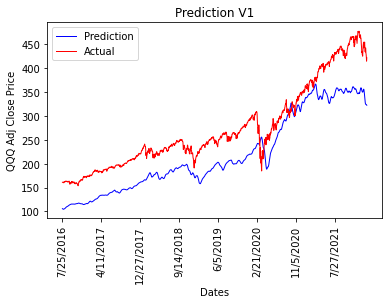

In [ ]:
lineWidth = 1
plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x_dates, actual_prediction, lw=lineWidth, c='b', label = "Prediction")
plt.plot(x_dates, actual_test, lw=lineWidth, c='r', label = "Actual")
plt.gcf().autofmt_xdate()
plt.title('Prediction V1')
plt.xlabel('Dates')
plt.ylabel('QQQ Adj Close Price')
plt.xticks(x_val, x_labels, rotation=90)
plt.legend()
plt.show()

Use the deep learning models on SPY without macro

In [ ]:
df_SPY_noMacro = pd.read_csv('/drive/My Drive/Senior Project/Data/Final Dataset.csv')
df_SPY_noMacro = df_SPY_noMacro.iloc[: , 1:]
df_SPY_noMacro = df_SPY_noMacro.iloc[: , 1:]
df_SPY_noMacro = df_SPY_noMacro.iloc[: , :-6]

In [ ]:
#Perform scaling
sc = MinMaxScaler(feature_range=(0,1))
df_SPY_noMacro[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD']] = sc.fit_transform(df_SPY_noMacro[['DIAOpen', 'DIAHigh', 'DIALow', 'DIAClose', 'DIAdjClose', 'DIAVolume',
       'SPYOpen', 'SPYHigh', 'SPYLow', 'SPYClose', 'SPYAdjClose', 'SPYVolume',
       'QQQOpen', 'QQQHigh', 'QQQLow', 'QQQClose', 'QQQAdjClose', 'QQQVolume',
       'QQQ20dFWD']])

In [ ]:
df_SPY_noMacro.drop(columns = 'QQQ20dFWD',inplace=True)

In [ ]:
# Finding the value 75th percentile of TimeStamp
training_pt = math.floor((len(df_SPY_noMacro)*0.75))
training_pt = int(training_pt)
print(training_pt)

Pt_to_split = df_SPY_noMacro[training_pt:(training_pt+1)]['SPYAdjClose']
print("Index of split  =",Pt_to_split)
df_train = df_SPY_noMacro[:training_pt]
df_test = df_SPY_noMacro[training_pt+1:]
print("Number of observations in train = {} \
    \n Number of observations in test = {}".format(df_train.shape[0],
                                                  df_test.shape[0]))

4335
Index of split  = 4335    0.321415
Name: SPYAdjClose, dtype: float64
Number of observations in train = 4335     
 Number of observations in test = 1444


In [ ]:
#separating into train and test sets
x1_train = df_train
x1_test = df_test

print("Training set has {} observations.".format(len(x1_train)))
print("Test set has {} observations.".format(len(x1_test)))

Training set has 4335 observations.
Test set has 1444 observations.


In [ ]:
def to_sequences(seq_size, obs):
    length_obs = obs.shape[0]
    #print("length_obs")
    #print(length_obs)
    x = []
    y = []
    PA = 20 # Hyper parameter

    for i in range(length_obs-SEQUENCE_SIZE-PA):
#         window = obs[i:(i+SEQUENCE_SIZE)]
        window = obs.iloc[i:(i+SEQUENCE_SIZE)]
#         after_window = obs[i+SEQUENCE_SIZE]
        after_window = obs.iloc[i+SEQUENCE_SIZE+PA]
#         window = [[x] for x in window]
        #print("{} - {}".format(window,after_window))
        x.append(np.array(window))
#         y.append(after_window)
        y.append(after_window['SPYAdjClose'])
        #y.append(after_window[QQQ20dFWD[i]])
        
#     return np.array(x),np.array(y)
    return np.array(x),np.array(y)
    
    
SEQUENCE_SIZE = 16
x_train,y_train = to_sequences(SEQUENCE_SIZE,x1_train)
x_test,y_test = to_sequences(SEQUENCE_SIZE,x1_test)

print("Training : Shape of X: {} & Y shape = {}".format(x_train.shape,len(y_train)))
print("Test : Shape of X: {} & Y shape = {} ".format(x_test.shape,len(y_test)))

In [ ]:
model_02 = keras.models.load_model('/drive/My Drive/Senior Project/Data/noMacro.0785')

In [ ]:
y_pred = model_02.predict(x_test)
score = np.sqrt(metrics.mean_squared_error(y_pred,y_test))
print("Final score (RMSE): {}".format(score))

Final score (RMSE): 0.12324892517254582


In [ ]:
x_dates = df['Date'].values

SPYAdjClose_normal = df['SPYAdjClose'].values

actual_prediction = y_pred * SPYAdjClose_normal.max()
actual_test = y_test * SPYAdjClose_normal.max()

x_dates = x_dates[-(actual_prediction.shape[0]):]

x_val = []
x_labels = []
for i in range(0, actual_prediction.shape[0]):
  if (i%180==0):
    x_val.append(i)
    x_labels.append(x_dates[i])

In [ ]:
lineWidth = 1
plt.figure()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y/%m/%d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator())
plt.plot(x_dates, actual_prediction, lw=lineWidth, c='b', label = "Prediction")
plt.plot(x_dates, actual_test, lw=lineWidth, c='r', label = "Actual")
plt.gcf().autofmt_xdate()
plt.title('Prediction V1')
plt.xlabel('Dates')
plt.ylabel('QQQ Adj Close Price')
plt.xticks(x_val, x_labels, rotation=90)
plt.legend()
plt.show()

In [ ]:
#model.save('/drive/My Drive/Senior Project/Data/Test_01')
#model_01 = keras.models.load_model('/drive/My Drive/Senior Project/Data/Test_01')